In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df_orig = pd.read_csv('winequality-red.csv')

In [3]:
df = df_orig.copy()

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

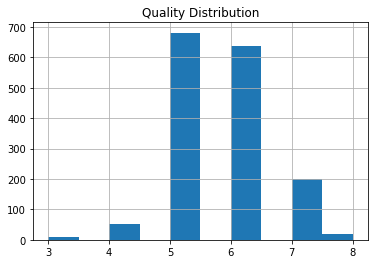

In [6]:
df['quality'].hist();
plt.title('Quality Distribution');

In [7]:
df['quality'].nunique()

6

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

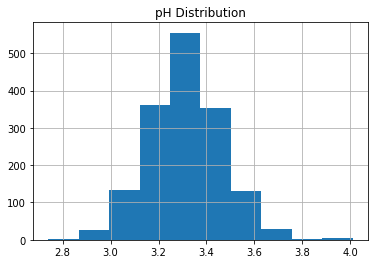

In [9]:
df['pH'].hist();
plt.title('pH Distribution');

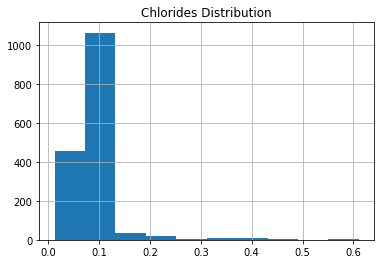

In [10]:
df['chlorides'].hist();
plt.title('Chlorides Distribution');

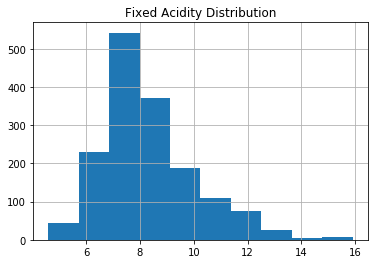

In [11]:
df['fixed acidity'].hist();
plt.title('Fixed Acidity Distribution');

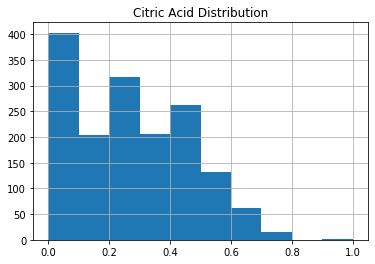

In [12]:
df['citric acid'].hist();
plt.title('Citric Acid Distribution');

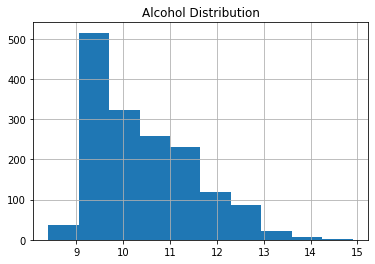

In [13]:
df['alcohol'].hist();
plt.title('Alcohol Distribution');

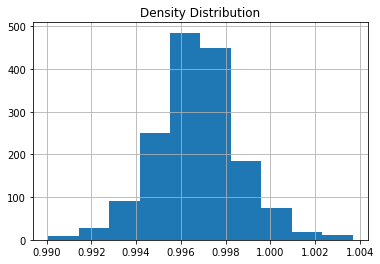

In [14]:
df['density'].hist();
plt.title('Density Distribution');

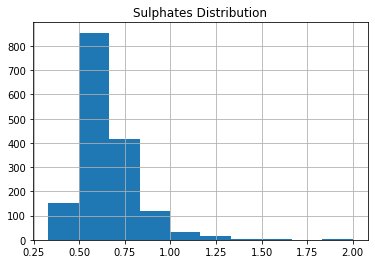

In [15]:
df['sulphates'].hist();
plt.title('Sulphates Distribution');

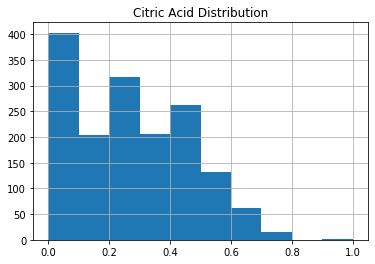

In [16]:
df['citric acid'].hist();
plt.title('Citric Acid Distribution');

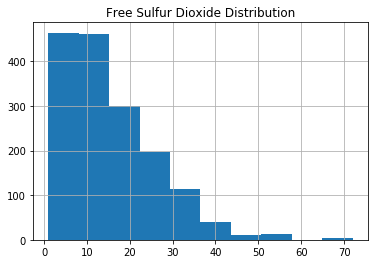

In [17]:
df['free sulfur dioxide'].hist();
plt.title('Free Sulfur Dioxide Distribution');

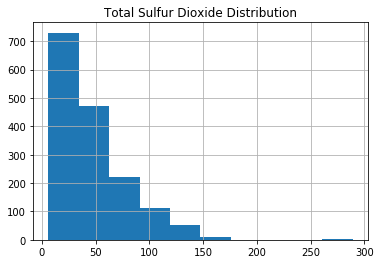

In [18]:
df['total sulfur dioxide'].hist();
plt.title('Total Sulfur Dioxide Distribution');

In [19]:
# we can see there is an imbalance in different quality
df['quality'].value_counts(True).sort_values()

3    0.006254
8    0.011257
4    0.033146
7    0.124453
6    0.398999
5    0.425891
Name: quality, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
#sns.pairplot(df)

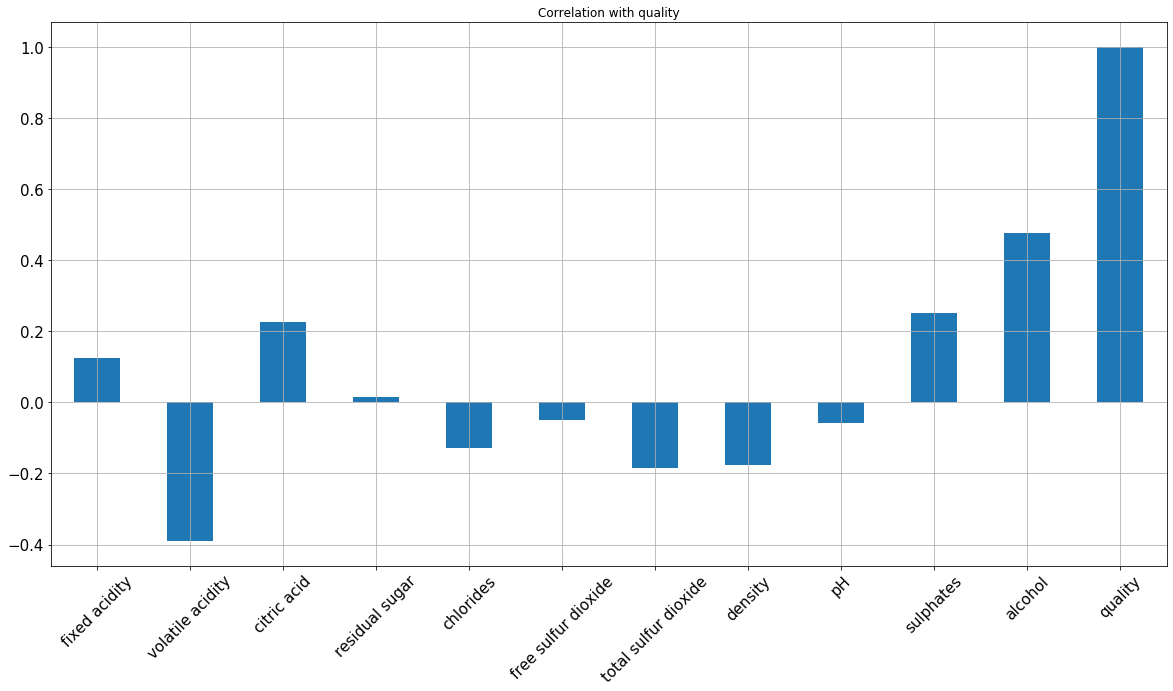

In [25]:
#Correlation with Quality with respect to attributes
cc = df.corrwith(df.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)


In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
ff = df.groupby('quality').agg({'density':'count'}).reset_index()

In [28]:
ff.rename({'density':'Count'},axis=1, inplace=True)

In [29]:
ff.sort_values(by = 'Count')

,quality,Count
0,3,10
5,8,18
1,4,53
4,7,199
3,6,638
2,5,681


In [30]:
df.groupby('quality').agg({'density':'mean'}).reset_index()

,quality,density
0,3,0.997464
1,4,0.996542
2,5,0.997104
3,6,0.996615
4,7,0.996104
5,8,0.995212


In [31]:
df.groupby('quality').agg({'pH':'mean'}).reset_index()

,quality,pH
0,3,3.398000
1,4,3.381509
2,5,3.304949
3,6,3.318072
4,7,3.290754
5,8,3.267222


In [32]:
df.groupby('quality').agg({'chlorides':'mean'}).reset_index()

,quality,chlorides
0,3,0.122500
1,4,0.090679
2,5,0.092736
3,6,0.084956
4,7,0.076588
5,8,0.068444


In [33]:
rsmean = df.groupby('quality').agg({'residual sugar':'mean'}).reset_index()

Text(0.5, 1.0, 'Residual Sugar ')

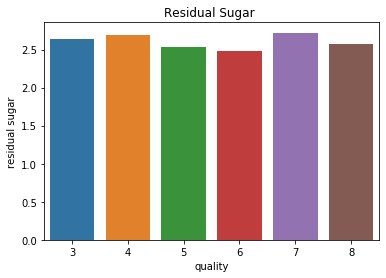

In [34]:
sns.barplot(data = rsmean, x='quality',y='residual sugar')
plt.title("Residual Sugar ")

In [35]:
ccmean = df.groupby('quality').agg({'citric acid':'mean'}).reset_index()

In [36]:
ccmean

,quality,citric acid
0,3,0.171000
1,4,0.174151
2,5,0.243686
3,6,0.273824
4,7,0.375176
5,8,0.391111


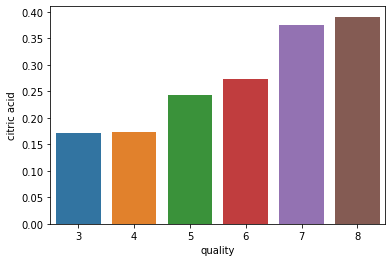

In [37]:
sns.barplot(data = ccmean, x='quality',y='citric acid')

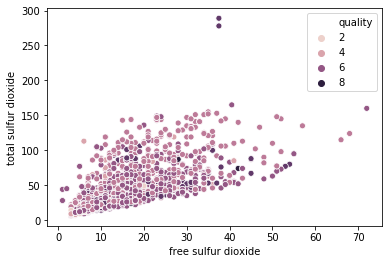

In [38]:
sns.scatterplot(x="free sulfur dioxide", y="total sulfur dioxide",hue = 'quality', data=df)

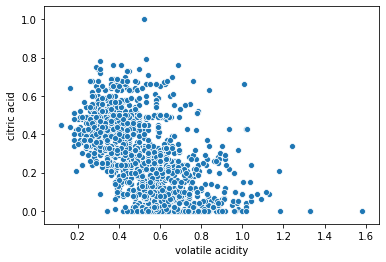

In [39]:
sns.scatterplot(x="volatile acidity", y="citric acid", data=df)

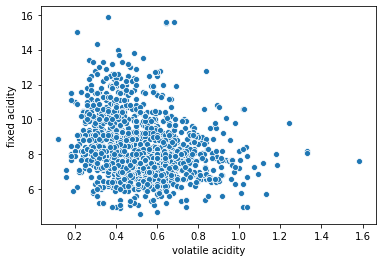

In [40]:
sns.scatterplot(x="volatile acidity", y="fixed acidity", data=df)

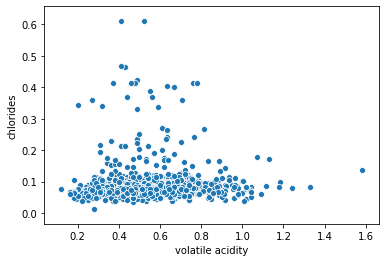

In [41]:
sns.scatterplot(x="volatile acidity", y="chlorides", data=df)

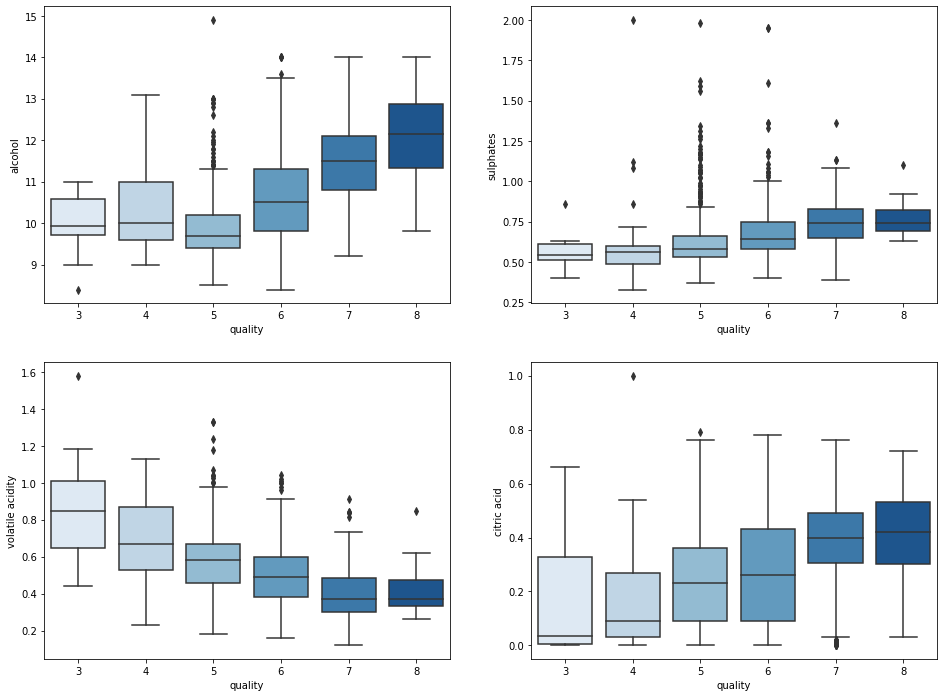

In [42]:
f2, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.boxplot('quality', 'alcohol', data=df, ax=ax[0, 0], palette='Blues')
sns.boxplot('quality', 'sulphates', data=df, ax=ax[0, 1], palette='Blues')
sns.boxplot('quality', 'volatile acidity', data=df, ax=ax[1, 0], palette='Blues')
sns.boxplot('quality', 'citric acid', data=df, ax=ax[1, 1], palette='Blues')

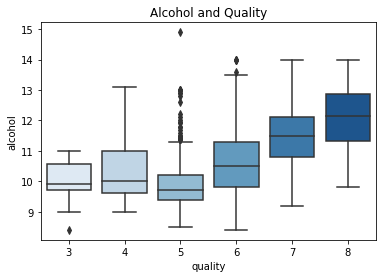

In [43]:
sns.boxplot('quality', 'alcohol', data=df, palette='Blues');
plt.title('Alcohol and Quality');

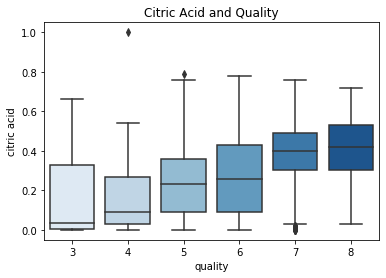

In [44]:
sns.boxplot('quality', 'citric acid', data=df, palette='Blues');
plt.title('Citric Acid and Quality');

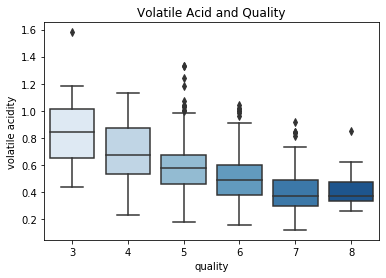

In [45]:
sns.boxplot('quality', 'volatile acidity', data=df, palette='Blues');
plt.title('Volatile Acid and Quality');

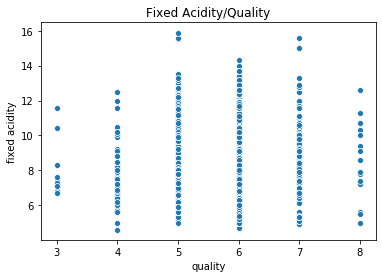

In [46]:
sns.scatterplot('quality', 'fixed acidity', data=df, palette='Blues');
plt.title('Fixed Acidity/Quality');

# Modeling / Machine Learning

In [47]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Model 1

In [48]:
k_means1 = KMeans(n_clusters=3, init = 'k-means++', algorithm = 'auto', random_state=42)
k_means1.fit(df)
y_hat1 = k_means1.predict(df)

In [49]:
labels1 = k_means1.labels_
metrics.silhouette_score(df,labels1,'euclidean')
metrics.calinski_harabaz_score(df,labels1)

3058.443698386962

In [50]:
print(f"The Silhouette score of Model 2 is {metrics.silhouette_score(df,labels1,'euclidean')}")
print(f"The Calinski score of Model 2 is {metrics.calinski_harabaz_score(df,labels1)}")

The Silhouette score of Model 2 is 0.5196013412369539
The Calinski score of Model 2 is 3058.443698386962


# Put some visuals here

In [91]:
kmeans1_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42}
   

In [92]:
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans1_kwargs)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans1_kwargs.labels_)
    silhouette_coefficients.append(score)

AttributeError: 'dict' object has no attribute 'labels_'

# Model 2

In [51]:
k_means2 = KMeans(n_clusters=4, init = 'k-means++', algorithm = 'auto', random_state=42)
k_means2.fit(df)
y_hat2 = k_means2.predict(df)


In [52]:
labels2 = k_means2.labels_
metrics.silhouette_score(df,labels2,'euclidean')
metrics.calinski_harabaz_score(df,labels2)

3051.5683982535343

In [53]:
print(f"The Silhouette score of Model 2 is {metrics.silhouette_score(df,labels2,'euclidean')}")
print(f"The Calinski score of Model 2 is {metrics.calinski_harabaz_score(df,labels2)}")

The Silhouette score of Model 2 is 0.48375934291440664
The Calinski score of Model 2 is 3051.5683982535343


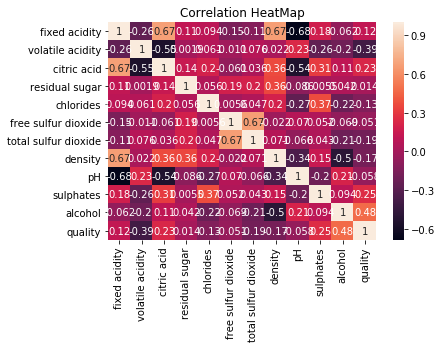

In [54]:
corr = df.corr() 
sns.heatmap(corr, annot=True)
plt.title('Correlation HeatMap');

# Model 3

In [55]:
k_means3 = KMeans(n_clusters=5, init = 'k-means++', algorithm = 'auto', random_state=42)
k_means3.fit(df)
y_hat3 = k_means3.predict(df)

In [56]:
k_means3.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [57]:
labels3 = k_means3.labels_
metrics.silhouette_score(df,labels3,'euclidean')
metrics.calinski_harabaz_score(df,labels3)

3036.8596398002774

In [58]:
print(f"The Silhouette score of Model 3 is {metrics.silhouette_score(df,labels3,'euclidean')}")
print(f"The Calinski score of Model 3 is {metrics.calinski_harabaz_score(df,labels3)}")

The Silhouette score of Model 3 is 0.44521950607338534
The Calinski score of Model 3 is 3036.8596398002774


In [59]:
df_dropped = df.drop('quality', axis=1)
X =df_dropped.values[:, 1:]
Clus_dataset = StandardScaler().fit_transform(X)

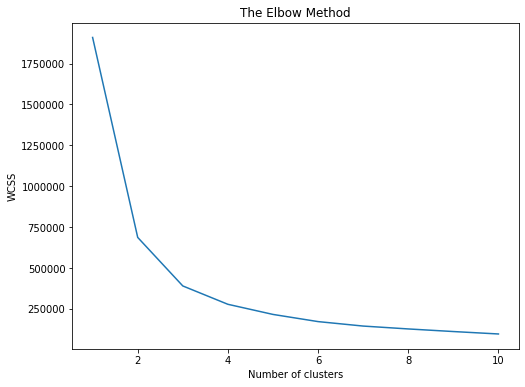

In [60]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
print(calinski_harabasz_score(df, kmeans.labels_))

3116.8463396062957


# Model 4

In [62]:
k_means4 = KMeans(n_clusters=6, init = 'k-means++', algorithm = 'auto', random_state=42)
k_means4.fit(df)
y_hat4 = k_means4.predict(df)

In [63]:
labels4 = k_means4.labels_
metrics.silhouette_score(df,labels4,'euclidean')
metrics.calinski_harabaz_score(df,labels4)

3103.100003945124

In [64]:
print(f"The Silhouette score of Model 2 is {metrics.silhouette_score(df,labels4,'euclidean')}")
print(f"The Calinski score of Model 2 is {metrics.calinski_harabaz_score(df,labels4)}")

The Silhouette score of Model 2 is 0.4462630538654589
The Calinski score of Model 2 is 3103.100003945124


# Model 5

In [65]:
k_means5 = KMeans(n_clusters=7, init = 'k-means++', algorithm = 'auto', random_state=42)
k_means5.fit(df)
y_hat5 = k_means5.predict(df)

In [66]:
labels5 = k_means5.labels_
metrics.silhouette_score(df,labels5,'euclidean')
metrics.calinski_harabaz_score(df,labels5)

3103.533471124223

In [67]:
print(f"The Silhouette score of Model 2 is {metrics.silhouette_score(df,labels5,'euclidean')}")
print(f"The Calinski score of Model 2 is {metrics.calinski_harabaz_score(df,labels5)}")

The Silhouette score of Model 2 is 0.3906668636535391
The Calinski score of Model 2 is 3103.533471124223


# Normalizing and Scaling the Data

In [68]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [69]:
scaled_features

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [70]:
kmeansS = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42)

In [71]:
kmeansS.fit(scaled_features)
y_hatS = kmeansS.predict(scaled_features)

In [72]:
# The lowest SSE value
kmeansS.inertia_

14035.51585692734

In [73]:
# Final locations of the centroid
kmeansS.cluster_centers_


array([[-0.6484071 ,  0.49341411, -0.77913261, -0.22873516, -0.17276031,
        -0.25856236, -0.37014822, -0.42679815,  0.62046736, -0.31515653,
         0.03242672, -0.16144924],
       [-0.06221996,  0.05335432,  0.09702939,  0.3682583 , -0.00383543,
         1.02508058,  1.27698042,  0.29892292, -0.17737725, -0.19851134,
        -0.5555444 , -0.43984548],
       [ 0.94796832, -0.72596649,  1.00761726,  0.03578961,  0.24282329,
        -0.42545041, -0.46328216,  0.36387338, -0.72581193,  0.58953175,
         0.3801239 ,  0.56078957]])

In [74]:
# The number of iterations required to converge
kmeansS.n_iter_


13

In [75]:
labelsS = kmeansS.labels_
metrics.silhouette_score(df,labelsS,'euclidean')
metrics.calinski_harabaz_score(df,labelsS)
print(f"The Silhouette score of Model 2 is {metrics.silhouette_score(df,labelsS,'euclidean')}")
print(f"The Calinski score of Model 2 is {metrics.calinski_harabaz_score(df,labelsS)}")

The Silhouette score of Model 2 is 0.061685783015003506
The Calinski score of Model 2 is 817.103673997878


In [76]:
kmeansS_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeansS_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

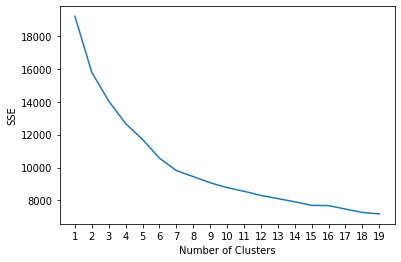

In [77]:
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [78]:
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeansS_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

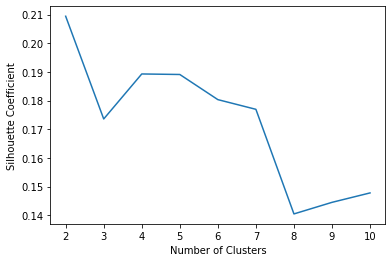

In [79]:

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [80]:
df_dropped = df.drop('quality', axis=1)
X =df_dropped.values[:, 1:]
Clus_dataset = StandardScaler().fit_transform(X)

In [81]:
k_meansN = KMeans(n_clusters=4, init = 'k-means++', algorithm = 'auto', random_state=42)
k_meansN.fit(X)
y_hatN = k_meansN.predict(X)

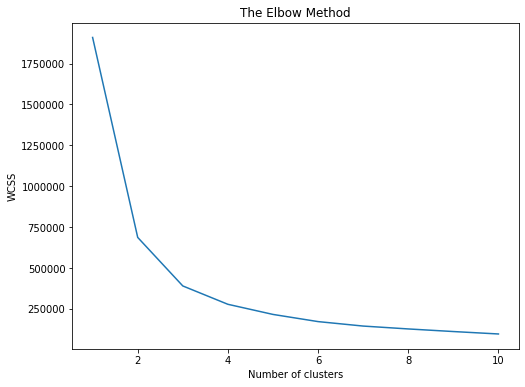

In [82]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
clusterNum = 2
k_meansN2 =KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_meansN2.fit(X)
labels = k_meansN2.labels_
print(labels)

[1 0 1 ... 1 1 1]


In [84]:
df_dropped['Clus_km'] = labels
print(df_dropped.head())

print(df_dropped.groupby('Clus_km').mean())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Clus_km  
0      9.4        1  
1      9.8        0  
2      9.8        1 

Text(0, 0.5, 'total sulfur dioxide')

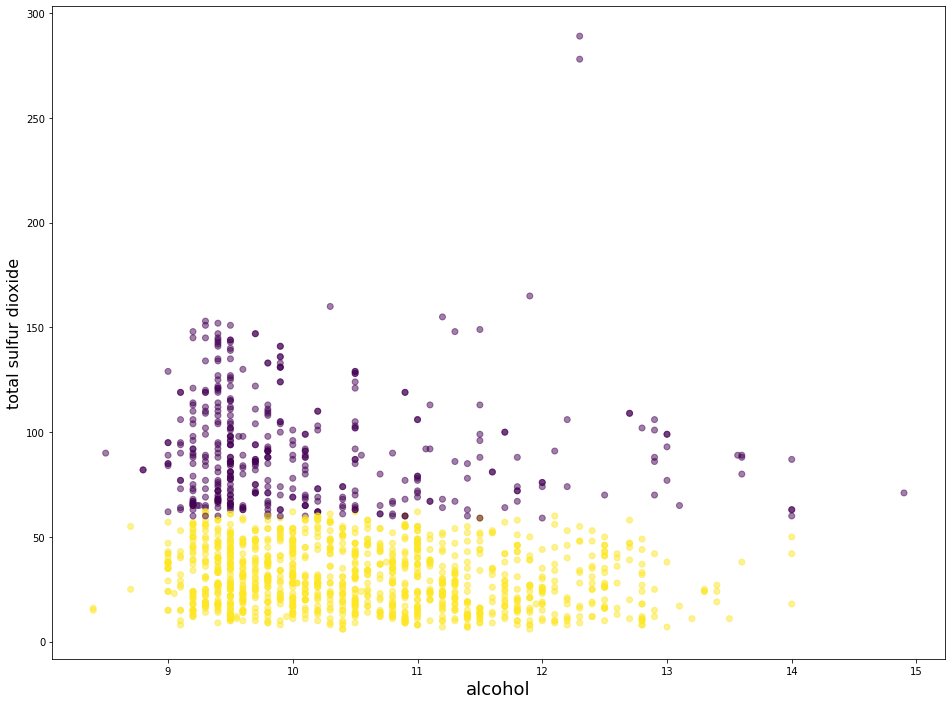

In [85]:
f3, ax = plt.subplots(figsize=(16, 12))
plt.scatter(X[:, 9], X[:, 5], c=labels.astype(np.float), alpha=.5)
plt.xlabel('alcohol', fontsize=18)
plt.ylabel('total sulfur dioxide', fontsize=16)

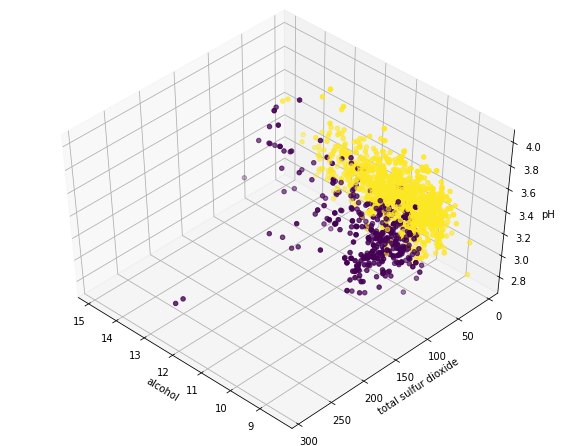

In [86]:
from mpl_toolkits.mplot3d import Axes3D
f4 = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(f4, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('alcohol')
ax.set_ylabel('total sulfur dioxide')
ax.set_zlabel('pH')

ax.scatter(X[:, 9], X[:, 5], X[:, 7], c= labels.astype(np.float))